#**Movie Genre Classification**

##1. **Introduction:**
This project builds a machine learning model to predict movie genres from plot summaries. Using text preprocessing techniques like TF-IDF and classifiers such as Naive Bayes, Logistic Regression, or SVM, the model is trained and evaluated on metrics like accuracy and F1-score for robust performance.

###**2. Imporing Libraries and loading datasets**

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import gensim
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/train_data.txt', sep=':::', names=['Title','Genre','Description'])

<ipython-input-2-163438a39507>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('/content/train_data.txt', sep=':::', names=['Title','Genre','Description'])


In [4]:
#reviewing the dataset

df.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
df.shape

(54214, 3)

In [6]:
#Checking for null values

df.isnull().sum()

,0
Title,0
Genre,0
Description,0


##**3. Data Wrangling:**
Now we will clean, structure, and transform raw data into a format suitable for analysis

###3.1. Looking for different Genres

In [7]:
classes = df['Genre'].unique()
classes

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [8]:
#Count of Genres in the dataset
n_classes = df['Genre'].nunique()
n_classes

27

###3.2. Handling Duplicates

In [19]:
# Check for duplicates and remove them
print(f"Duplicates before: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Duplicates after: {df.duplicated().sum()}")

Duplicates before: 0
Duplicates after: 0


###**4. EDA (Exploatory Data Analysis)**
We will now visualize the Genre with the help of a bar diagram

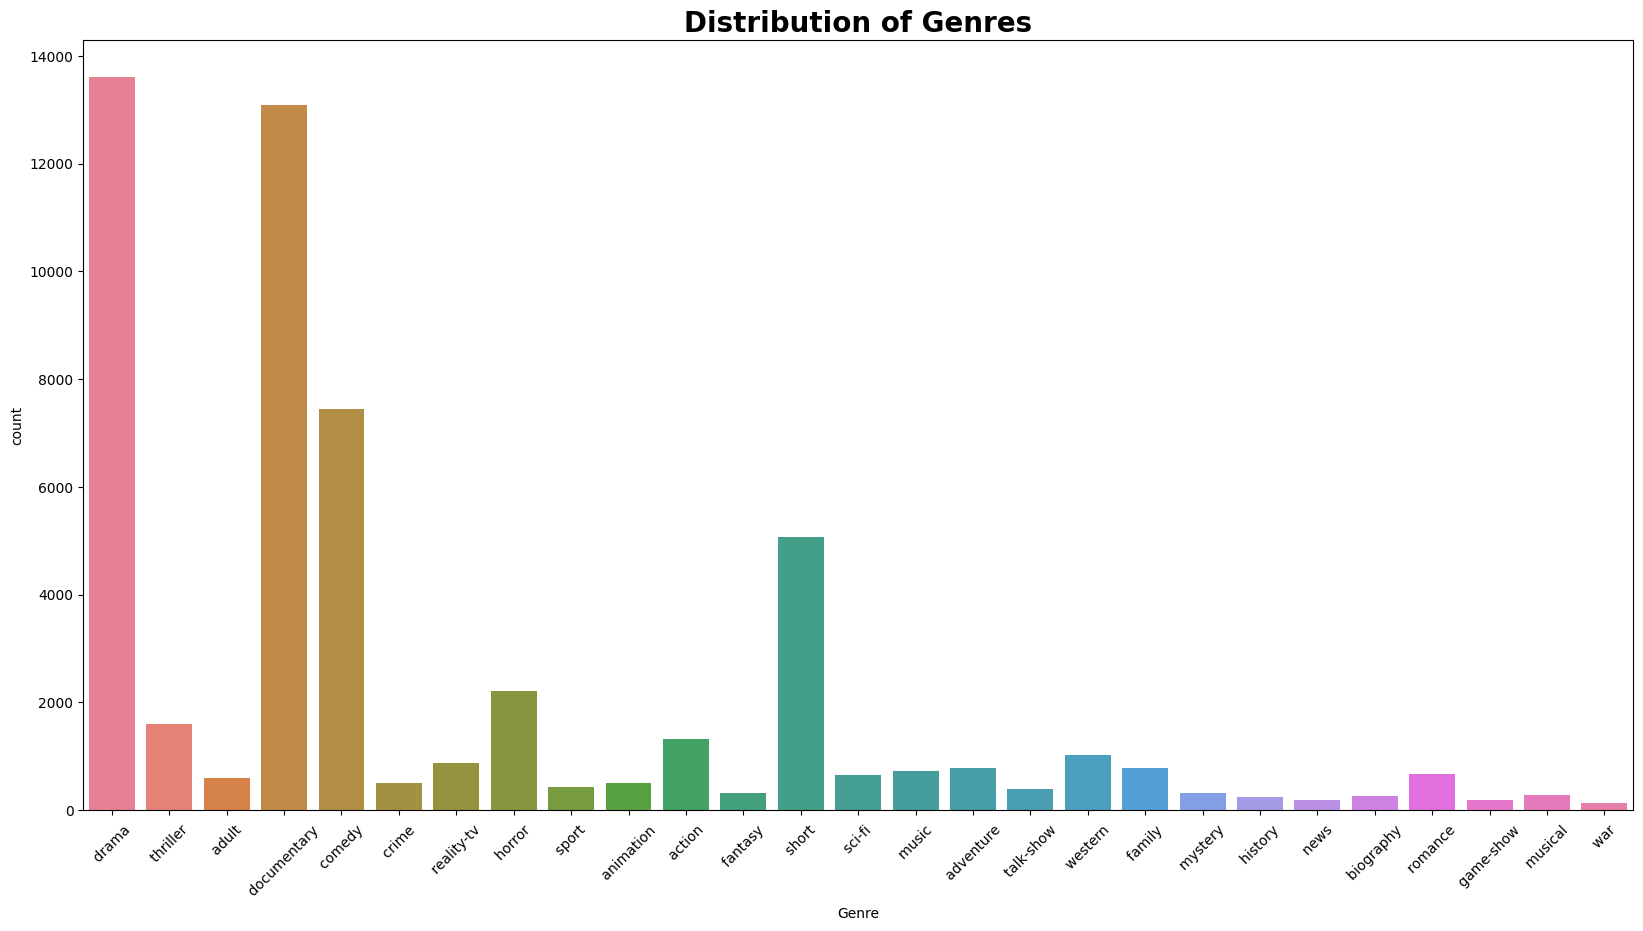

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Genre', hue='Genre', legend=False)
plt.title('Distribution of Genres', fontsize=20, weight='bold')
plt.xticks(rotation=45)
plt.show()

Here we can see that the genre which we have the most is **drama**, followed by **documentary**, and **comedy**.

##**5. Text Preprocessing:**
We will preprocess the text data (plot summaries) to clean it and prepare it for vectorization. The process includes:
1. Lowercasing text.
2. Removing punctuation, special characters, and stopwords.
3. Tokenizing text into words.



In [23]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already done
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Apply cleaning function to the Description column
df['Cleaned_Plot'] = df['Description'].apply(clean_text)

# Display a few examples
print(df[['Description', 'Cleaned_Plot']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                         Description  \
1   Listening in to a conversation between his do...   
2   A brother and sister with a past incestuous r...   
3   As the bus empties the students for their fie...   
4   To help their unemployed father make ends mee...   
5   The film's title refers not only to the un-re...   

                                        Cleaned_Plot  
1  listening conversation doctor parents yearold ...  
2  brother sister past incestuous relationship cu...  
3  bus empties students field trip museum natural...  
4  help unemployed father make ends meet edith tw...  
5  films title refers unrecovered bodies ground z...  


##**6. Vectorize the Text Using TF-IDF:**
We’ll transform the cleaned text data into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency). This will convert the plot summaries into vectors that can be used as input for machine learning models.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features to keep it manageable

# Fit and transform the cleaned text
X = tfidf_vectorizer.fit_transform(df['Cleaned_Plot'])

# Convert to array for easier manipulation
X_array = X.toarray()

# Print shape of resulting matrix
print(f"TF-IDF matrix shape: {X_array.shape}")

TF-IDF matrix shape: (54214, 5000)


* The TF-IDF vectorizer converts each plot summary into a numerical vector of size 5000 (or the number of features you choose).
* The resulting X is a sparse matrix, with each row representing a movie and each column representing a word feature.

##**7. Encode the Genres:**
We need to convert the genres (categorical labels) into numerical format since machine learning models work with numbers. We will use **LabelEncoder** to transform the genres into integers.

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable (Genre)
y = label_encoder.fit_transform(df['Genre'])

# Display the mapping of genres to numerical labels
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

# Check the transformed target variable
print("Encoded Genres:", y[:10])  # Show the first 10 encoded genres

Label Mapping: {' action ': 0, ' adult ': 1, ' adventure ': 2, ' animation ': 3, ' biography ': 4, ' comedy ': 5, ' crime ': 6, ' documentary ': 7, ' drama ': 8, ' family ': 9, ' fantasy ': 10, ' game-show ': 11, ' history ': 12, ' horror ': 13, ' music ': 14, ' musical ': 15, ' mystery ': 16, ' news ': 17, ' reality-tv ': 18, ' romance ': 19, ' sci-fi ': 20, ' short ': 21, ' sport ': 22, ' talk-show ': 23, ' thriller ': 24, ' war ': 25, ' western ': 26}
Encoded Genres: [ 8 24  1  8  8  7  5  6 18 13]


* **labelencoder** assigns a unique number to each genre.
* The y variable now contains the numerical labels for the genres, ready for training the model.

##**8. Splitting the data:**

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (43371, 5000), (43371,)
Testing set shape: (10843, 5000), (10843,)


##**9. Logistic Regression:**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=1):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted', zero_division=1):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted', zero_division=1):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Model Performance Metrics:
Accuracy: 0.58
Precision: 0.57
Recall: 0.58
F1-Score: 0.54

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.25      0.33       263
           1       0.78      0.22      0.35       112
           2       0.41      0.14      0.21       139
           3       0.64      0.09      0.15       104
           4       1.00      0.00      0.00        61
           5       0.51      0.58      0.54      1443
           6       0.20      0.01      0.02       107
           7       0.67      0.84      0.75      2659
           8       0.54      0.78      0.64      2697
           9       0.50      0.09      0.16       150
          10       0.00      0.00      0.00        74
          11       0.94      0.42      0.59        40
          12       1.00      0.00      0.00        45
          13       0.62      0.55      0.58       431
          14       0.65      0.47      0.55       144
          15       0.33  

##**10. Naive Bayes Classifier:**
Since we are working with text data, Multinomial Naive Bayes is a good choice as it performs well on word-count.

In [29]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Multinomial Naive Bayes
nb_classifier = MultinomialNB()

# Train the Naive Bayes model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
print("Naive Bayes Model Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='weighted', zero_division=1):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='weighted', zero_division=1):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb, average='weighted', zero_division=1):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb, zero_division=1))

Naive Bayes Model Performance Metrics:
Accuracy: 0.52
Precision: 0.59
Recall: 0.52
F1-Score: 0.44

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.08      0.14       263
           1       1.00      0.05      0.10       112
           2       0.40      0.04      0.08       139
           3       1.00      0.00      0.00       104
           4       1.00      0.00      0.00        61
           5       0.51      0.43      0.47      1443
           6       1.00      0.00      0.00       107
           7       0.58      0.88      0.70      2659
           8       0.45      0.83      0.59      2697
           9       1.00      0.01      0.01       150
          10       1.00      0.00      0.00        74
          11       1.00      0.15      0.26        40
          12       1.00      0.00      0.00        45
          13       0.72      0.34      0.47       431
          14       0.77      0.12      0.20       144
          15 

##**11. Support Vector Machine (SVM):**

In [30]:
from sklearn.svm import SVC

# Initialize Support Vector Classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
print("SVM Model Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted', zero_division=1):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted', zero_division=1):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm, average='weighted', zero_division=1):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=1))

SVM Model Performance Metrics:
Accuracy: 0.58
Precision: 0.57
Recall: 0.58
F1-Score: 0.55

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.32      0.36       263
           1       0.69      0.38      0.49       112
           2       0.46      0.24      0.32       139
           3       0.55      0.15      0.24       104
           4       1.00      0.00      0.00        61
           5       0.51      0.59      0.55      1443
           6       0.13      0.02      0.03       107
           7       0.68      0.83      0.75      2659
           8       0.55      0.75      0.63      2697
           9       0.31      0.09      0.14       150
          10       0.29      0.03      0.05        74
          11       0.92      0.57      0.71        40
          12       1.00      0.00      0.00        45
          13       0.64      0.61      0.62       431
          14       0.64      0.53      0.58       144
          15       0.

#**12. Conclusion:**
In this assignment, I built a machine learning model to predict movie genres based on plot summaries. The process involved the following key steps:

* I used **TF-IDF** to transform the plot summaries into numerical features that can be used for classification.
* I trained multiple classifiers, including **Logistic Regression**, **Naive Bayes**, and **Support Vector Machine (SVM)**, to predict movie genres.
* The models were evaluated using metrics such as **accuracy**, **precision**, **recall**, and **F1-score**. The **Logistic Regression and SVM models** achieved the **highest accuracy**, both around ***58%***.
* The results highlight that while the models performed reasonably well, there is **still room for improvement**, particularly in **handling class imbalance** and through **hyperparameter tuning**.